In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
from pymongo import MongoClient
import streamlit as st

client = MongoClient(st.secrets['MONGO_URL'])
db = client['machinelearning']
households_df_collection = db['households_df_collection']
products_df_collection = db['products_df_collection']
transaction_df_collection = db['transaction_df_collection']

In [101]:
households_data = households_df_collection.find()
households_df = pd.DataFrame(list(households_data))

products_data = products_df_collection.find()
products_df = pd.DataFrame(list(products_data))

transactions_data = transaction_df_collection.find()
transactions_df = pd.DataFrame(list(transactions_data))

In [102]:
households_df

,_id,HSHD_NUM,L,AGE_RANGE,MARITAL,INCOME_RANGE,HOMEOWNER,HSHD_COMPOSITION,HH_SIZE,CHILDREN
0,6755fda47385affce0167c86,1600,Y,null ...,null,null ...,null,null,null ...,NaN
1,6755fda47385affce0167c87,159,Y,null ...,null,null ...,null,null,null ...,NaN
2,6755fda47385affce0167c88,210,Y,null ...,null,null ...,null,null,null ...,NaN
3,6755fda47385affce0167c89,616,Y,null ...,null,null ...,null,null,null ...,NaN
4,6755fda47385affce0167c8a,651,Y,null ...,null,null ...,null,null,null ...,NaN
...,...,...,...,...,...,...,...,...,...,...
395,6755fda47385affce0167e11,1373,Y,65-74 ...,Married,UNDER 35K ...,Homeowner,2 Adults and Kids,3 ...,1
396,6755fda47385affce0167e12,2232,N,65-74 ...,Married,UNDER 35K ...,Homeowner,2 Adults and Kids,3 ...,1
397,6755fda47385affce0167e13,2406,N,65-74 ...,Married,UNDER 35K ...,Homeowner,2 Adults and Kids,3 ...,1
398,6755fda47385affce0167e14,2654,Y,65-74 ...,Married,UNDER 35K ...,Homeowner,2 Adults and Kids,5+ ...,3+


In [103]:
products_df

,_id,PRODUCT_NUM,DEPARTMENT,COMMODITY,BRAND_TY,NATURAL_ORGANIC_FLAG
0,6755fda67385affce0167e16,72499,NON-FOOD,PET,PRIVATE,N
1,6755fda67385affce0167e17,74380,NON-FOOD,PET,PRIVATE,N
2,6755fda67385affce0167e18,74430,NON-FOOD,PET,PRIVATE,N
3,6755fda67385affce0167e19,89638,NON-FOOD,PET,PRIVATE,N
4,6755fda67385affce0167e1a,91659,NON-FOOD,PET,PRIVATE,N
...,...,...,...,...,...,...
67279,6755fda67385affce01784e5,4805630,FOOD,IN STORE FOOD SERVICE,NATIONAL,N
67280,6755fda67385affce01784e6,2460453,FOOD,IN STORE FOOD SERVICE,NATIONAL,N
67281,6755fda67385affce01784e7,2462609,FOOD,IN STORE FOOD SERVICE,NATIONAL,N
67282,6755fda67385affce01784e8,6630441,FOOD,IN STORE FOOD SERVICE,NATIONAL,N


In [104]:
transactions_df

,_id,BASKET_NUM,HSHD_NUM,PURCHASE_,PRODUCT_NUM,SPEND,UNITS,STORE_R,WEEK_NUM,YEAR
0,6755fdb67385affce01784ea,3685,3889,16-SEP-18,912428,1.99,1,SOUTH,37,2018
1,6755fdb67385affce01784eb,49054,779,22-SEP-19,4853832,1.00,1,CENTRAL,38,2019
2,6755fdb67385affce01784ec,2182,3411,02-SEP-18,5798805,1.29,1,SOUTH,35,2018
3,6755fdb67385affce01784ed,81730,3214,10-JUL-20,7308377,9.99,1,SOUTH,27,2020
4,6755fdb67385affce01784ee,26246,1748,19-MAR-19,74266,6.99,1,WEST,11,2019
...,...,...,...,...,...,...,...,...,...,...
19995,6755fdb67385affce017d305,39458,2575,05-JUL-19,910901,1.75,1,WEST,26,2019
19996,6755fdb67385affce017d306,82339,3889,17-JUL-20,2938332,2.50,1,SOUTH,28,2020
19997,6755fdb67385affce017d307,7879,3111,20-OCT-18,1256548,2.99,1,SOUTH,41,2018
19998,6755fdb67385affce017d308,42592,2442,30-JUL-19,3756139,3.39,1,WEST,30,2019


In [105]:
transactions_df_sample = transactions_df.sample(n=20000, random_state=42)
transactions_df_sample.to_csv('transactions.csv', index=False)

In [106]:
households_df.isnull().sum().sum()

228

In [107]:
households_df.head()

,_id,HSHD_NUM,L,AGE_RANGE,MARITAL,INCOME_RANGE,HOMEOWNER,HSHD_COMPOSITION,HH_SIZE,CHILDREN
0,6755fda47385affce0167c86,1600,Y,null ...,null,null ...,null,null,null ...,NaN
1,6755fda47385affce0167c87,159,Y,null ...,null,null ...,null,null,null ...,NaN
2,6755fda47385affce0167c88,210,Y,null ...,null,null ...,null,null,null ...,NaN
3,6755fda47385affce0167c89,616,Y,null ...,null,null ...,null,null,null ...,NaN
4,6755fda47385affce0167c8a,651,Y,null ...,null,null ...,null,null,null ...,NaN


In [108]:
households_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                                                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                    --------------  ----- 
 0   _id                                                                                                                                                                                                       400 non-null    object
 1   HSHD_NUM                                                                                                                                                                                                

In [109]:
households_df.replace(r'^\s*null\s*$', np.nan, regex=True, inplace=True)

In [110]:
households_df


,_id,HSHD_NUM,L,AGE_RANGE,MARITAL,INCOME_RANGE,HOMEOWNER,HSHD_COMPOSITION,HH_SIZE,CHILDREN
0,6755fda47385affce0167c86,1600,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6755fda47385affce0167c87,159,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6755fda47385affce0167c88,210,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6755fda47385affce0167c89,616,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6755fda47385affce0167c8a,651,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
395,6755fda47385affce0167e11,1373,Y,65-74 ...,Married,UNDER 35K ...,Homeowner,2 Adults and Kids,3 ...,1
396,6755fda47385affce0167e12,2232,N,65-74 ...,Married,UNDER 35K ...,Homeowner,2 Adults and Kids,3 ...,1
397,6755fda47385affce0167e13,2406,N,65-74 ...,Married,UNDER 35K ...,Homeowner,2 Adults and Kids,3 ...,1
398,6755fda47385affce0167e14,2654,Y,65-74 ...,Married,UNDER 35K ...,Homeowner,2 Adults and Kids,5+ ...,3+


In [111]:
households_df.isnull().sum()

_id                                                                                                                                                                                                           0
HSHD_NUM                                                                                                                                                                                                      0
L                                                                                                                                                                                                             0
AGE_RANGE                                                                                                                                                                                                    61
MARITAL                                                                                                                                                                 

In [112]:
for column in households_df.columns:
    if households_df[column].dtype == 'object':
        households_df[column].fillna(households_df[column].mode()[0], inplace=True)

In [113]:
households_df.isnull().sum()

_id                                                                                                                                                                                                         0
HSHD_NUM                                                                                                                                                                                                    0
L                                                                                                                                                                                                           0
AGE_RANGE                                                                                                                                                                                                   0
MARITAL                                                                                                                                                                         

In [114]:
products_df.isnull().sum()

_id                                 0
PRODUCT_NUM                         0
DEPARTMENT                          0
COMMODITY                           0
BRAND_TY                            0
NATURAL_ORGANIC_FLAG                0
dtype: int64

In [115]:
transactions_df.isnull().sum()

_id                                 0
BASKET_NUM                          0
HSHD_NUM                            0
PURCHASE_                           0
PRODUCT_NUM                         0
     SPEND                          0
     UNITS                          0
STORE_R                             0
  WEEK_NUM                          0
YEAR                                0
dtype: int64

In [116]:
households_df.columns = households_df.columns.str.replace(r'\s+', '', regex=True)

In [117]:
households_df.columns

Index(['_id', 'HSHD_NUM', 'L', 'AGE_RANGE', 'MARITAL', 'INCOME_RANGE',
       'HOMEOWNER', 'HSHD_COMPOSITION', 'HH_SIZE', 'CHILDREN'],
      dtype='object')

In [118]:
transactions_df.columns = transactions_df.columns.str.replace(r'\s+', '', regex=True)

In [119]:
households_transactions = pd.merge(
    transactions_df,
    households_df,
    how='inner',
    on='HSHD_NUM'
)

In [120]:
products_df.columns

Index(['_id', 'PRODUCT_NUM                     ', 'DEPARTMENT                ',
       'COMMODITY                 ', 'BRAND_TY', 'NATURAL_ORGANIC_FLAG'],
      dtype='object')

In [121]:
products_df.columns = products_df.columns.str.replace(r'\s+', '', regex=True)

In [122]:
final_df = pd.merge(
    households_transactions,
    products_df,
    how='inner',
    on='PRODUCT_NUM'
)

In [123]:
final_df.columns

Index(['_id_x', 'BASKET_NUM', 'HSHD_NUM', 'PURCHASE_', 'PRODUCT_NUM', 'SPEND',
       'UNITS', 'STORE_R', 'WEEK_NUM', 'YEAR', '_id_y', 'L', 'AGE_RANGE',
       'MARITAL', 'INCOME_RANGE', 'HOMEOWNER', 'HSHD_COMPOSITION', 'HH_SIZE',
       'CHILDREN', '_id', 'DEPARTMENT', 'COMMODITY', 'BRAND_TY',
       'NATURAL_ORGANIC_FLAG'],
      dtype='object')

In [124]:
final_df.head()

,_id_x,BASKET_NUM,HSHD_NUM,PURCHASE_,PRODUCT_NUM,SPEND,UNITS,STORE_R,WEEK_NUM,YEAR,...,INCOME_RANGE,HOMEOWNER,HSHD_COMPOSITION,HH_SIZE,CHILDREN,_id,DEPARTMENT,COMMODITY,BRAND_TY,NATURAL_ORGANIC_FLAG
0,6755fdb67385affce01784ea,3685,3889,16-SEP-18,912428,1.99,1,SOUTH,37,2018,...,50-74K ...,Homeowner,2 Adults and Kids,4 ...,2,6755fda67385affce0175dcf,FOOD,GROCERY STAPLE,NATIONAL,N
1,6755fdb67385affce017bd98,55657,3889,17-NOV-19,912428,1.99,1,SOUTH,46,2019,...,50-74K ...,Homeowner,2 Adults and Kids,4 ...,2,6755fda67385affce0175dcf,FOOD,GROCERY STAPLE,NATIONAL,N
2,6755fdb67385affce017c9e5,14165,3889,09-DEC-18,912428,1.99,1,SOUTH,49,2018,...,50-74K ...,Homeowner,2 Adults and Kids,4 ...,2,6755fda67385affce0175dcf,FOOD,GROCERY STAPLE,NATIONAL,N
3,6755fdb67385affce01784f2,20015,3889,26-JAN-19,5465881,1.49,1,SOUTH,3,2019,...,50-74K ...,Homeowner,2 Adults and Kids,4 ...,2,6755fda67385affce016c9fe,FOOD,GROCERY STAPLE,PRIVATE,N
4,6755fdb67385affce017b850,19393,1433,20-JAN-19,5465881,1.69,1,WEST,3,2019,...,50-74K ...,Homeowner,2 Adults and Kids,2 ...,1,6755fda67385affce016c9fe,FOOD,GROCERY STAPLE,PRIVATE,N


In [125]:
final_df['SPEND'] = pd.to_numeric(final_df['SPEND'], errors='coerce')
final_df['UNITS'] = pd.to_numeric(final_df['UNITS'], errors='coerce')

# Fill missing values in 'SPEND' and 'UNITS' with 0 (assuming missing values mean no purchase)
final_df['SPEND'].fillna(0, inplace=True)
final_df['UNITS'].fillna(0, inplace=True)

# 2. Feature Engineering: Calculate customer engagement metrics
# For example, customer engagement can be measured by total spend, total units bought, and number of transactions

engagement_df = final_df.groupby('HSHD_NUM').agg({
    'SPEND': 'sum',    # Total spend per household
    'UNITS': 'sum',    # Total units bought per household
    'BASKET_NUM': 'nunique'  # Number of unique transactions per household
}).reset_index()

# 3. Merge customer engagement metrics with household factors
merged_engagement_df = pd.merge(engagement_df, final_df[['HSHD_NUM', 'HH_SIZE', 'CHILDREN', 'STORE_R', 'INCOME_RANGE']], on='HSHD_NUM', how='left')


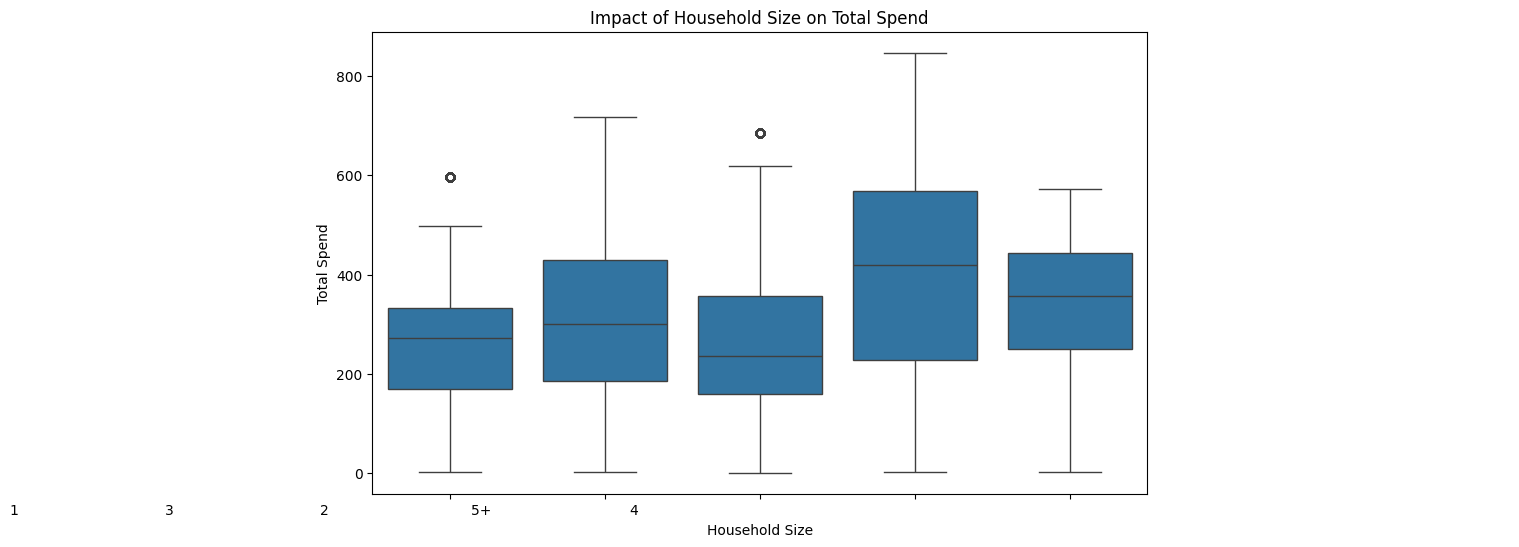

In [126]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='HH_SIZE', y='SPEND', data=merged_engagement_df)
plt.title('Impact of Household Size on Total Spend')
plt.xlabel('Household Size')
plt.ylabel('Total Spend')
plt.show()

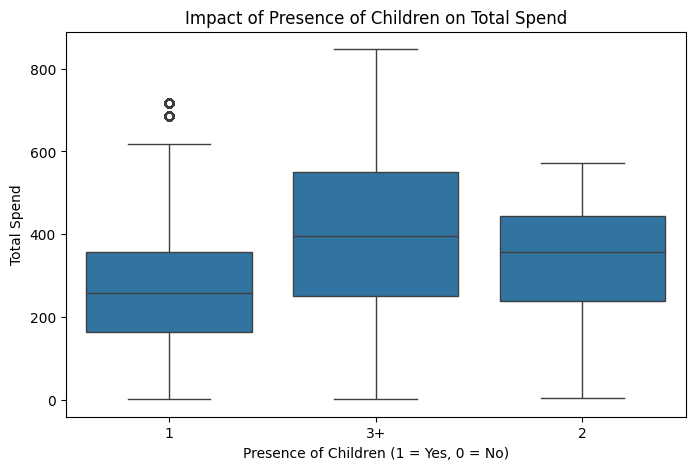

In [127]:
merged_engagement_df['CHILDREN'] = merged_engagement_df['CHILDREN'].replace({'Y': 1, 'N': 0})
plt.figure(figsize=(8, 5))
sns.boxplot(x='CHILDREN', y='SPEND', data=merged_engagement_df)
plt.title('Impact of Presence of Children on Total Spend')
plt.xlabel('Presence of Children (1 = Yes, 0 = No)')
plt.ylabel('Total Spend')
plt.show()

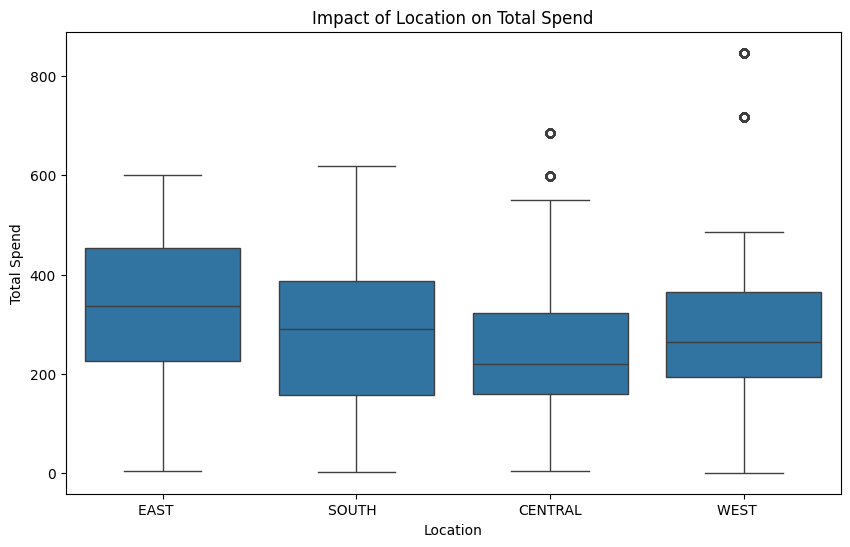

In [128]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='STORE_R', y='SPEND', data=merged_engagement_df)
plt.title('Impact of Location on Total Spend')
plt.xlabel('Location')
plt.ylabel('Total Spend')
plt.show()

In [129]:
from scipy import stats

household_size_groups = [group['SPEND'].values for name, group in merged_engagement_df.groupby('HH_SIZE')]
f_stat, p_val = stats.f_oneway(*household_size_groups)
print(f"ANOVA - Household Size vs Total Spend: F-stat = {f_stat}, p-value = {p_val}")

ANOVA - Household Size vs Total Spend: F-stat = 563.8321845108012, p-value = 0.0


In [130]:
children_groups = [group['SPEND'].values for name, group in merged_engagement_df.groupby('CHILDREN')]
f_stat, p_val = stats.f_oneway(*children_groups)
print(f"ANOVA - Presence of Children vs Total Spend: F-stat = {f_stat}, p-value = {p_val}")

ANOVA - Presence of Children vs Total Spend: F-stat = 871.9550390090614, p-value = 0.0


ENgagement over time

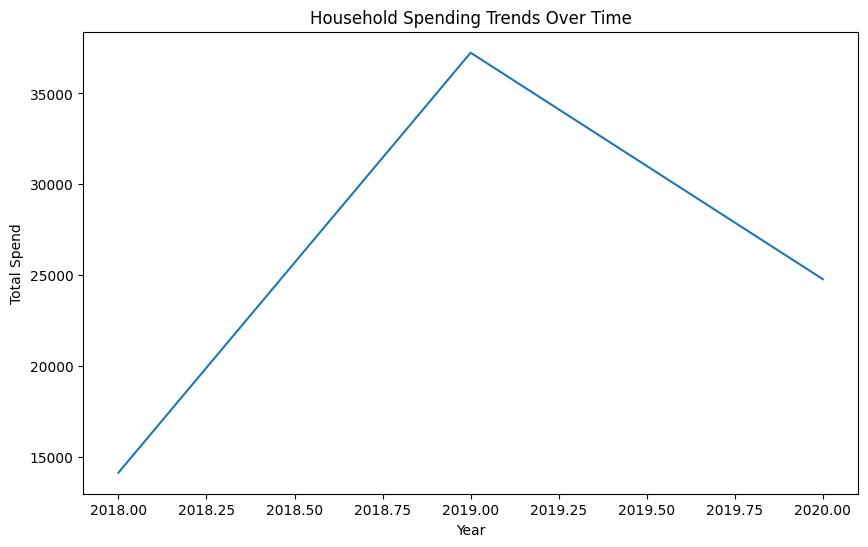

In [131]:
household_spend_trends = final_df.groupby('YEAR')['SPEND'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='SPEND', data=household_spend_trends)
plt.title('Household Spending Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Total Spend')
plt.show()

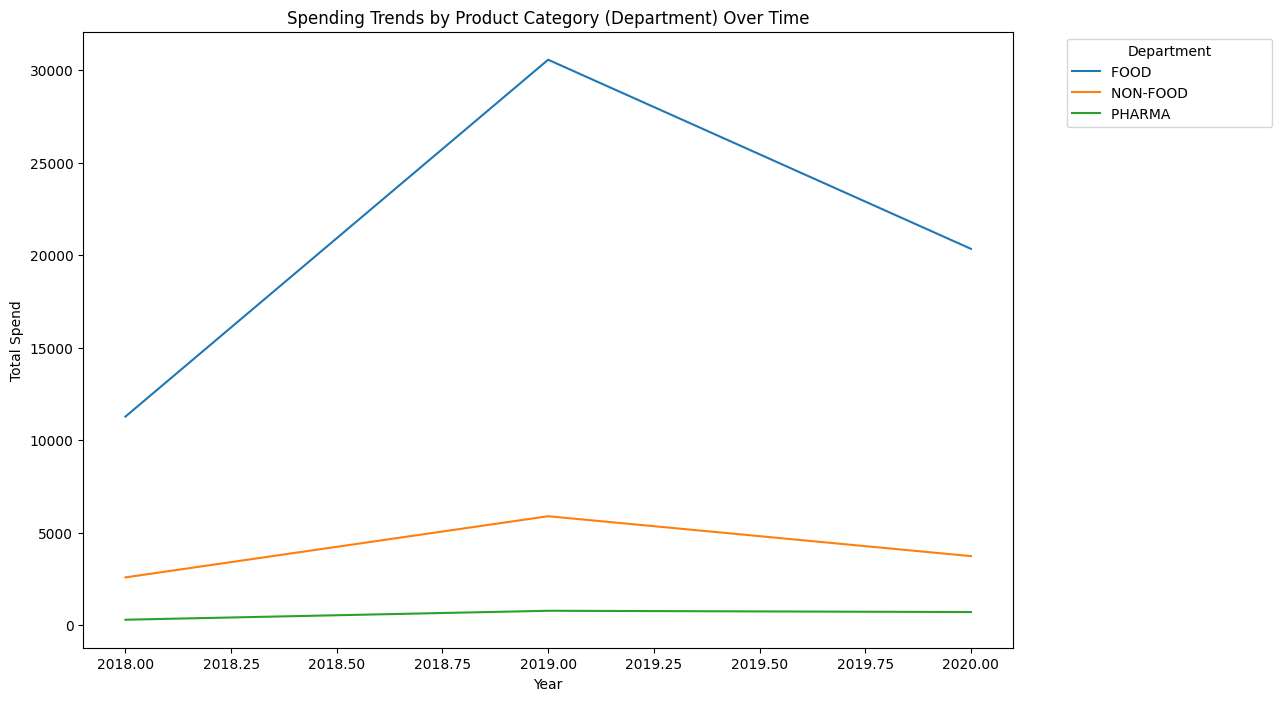

In [132]:
category_spend_trends = final_df.groupby(['YEAR', 'DEPARTMENT'])['SPEND'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x='YEAR', y='SPEND', hue='DEPARTMENT', data=category_spend_trends)
plt.title('Spending Trends by Product Category (Department) Over Time')
plt.xlabel('Year')
plt.ylabel('Total Spend')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

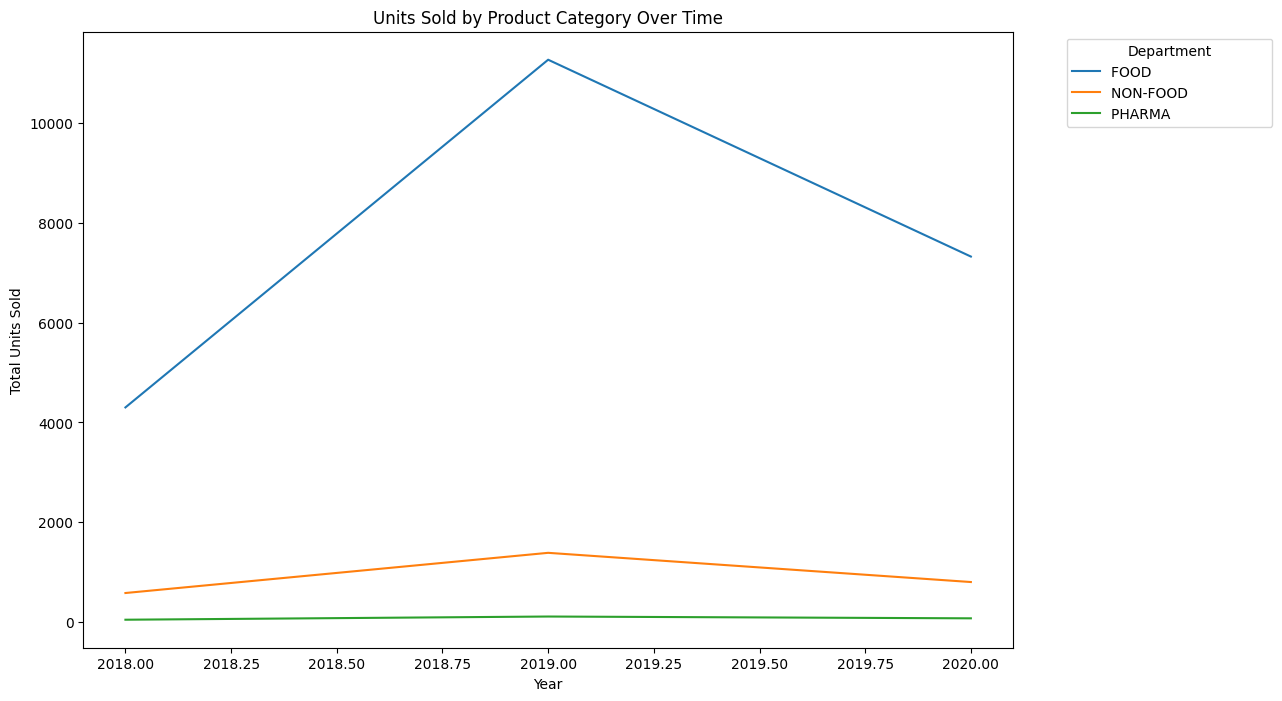

In [133]:
category_units_trends = final_df.groupby(['YEAR', 'DEPARTMENT'])['UNITS'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x='YEAR', y='UNITS', hue='DEPARTMENT', data=category_units_trends)
plt.title('Units Sold by Product Category Over Time')
plt.xlabel('Year')
plt.ylabel('Total Units Sold')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

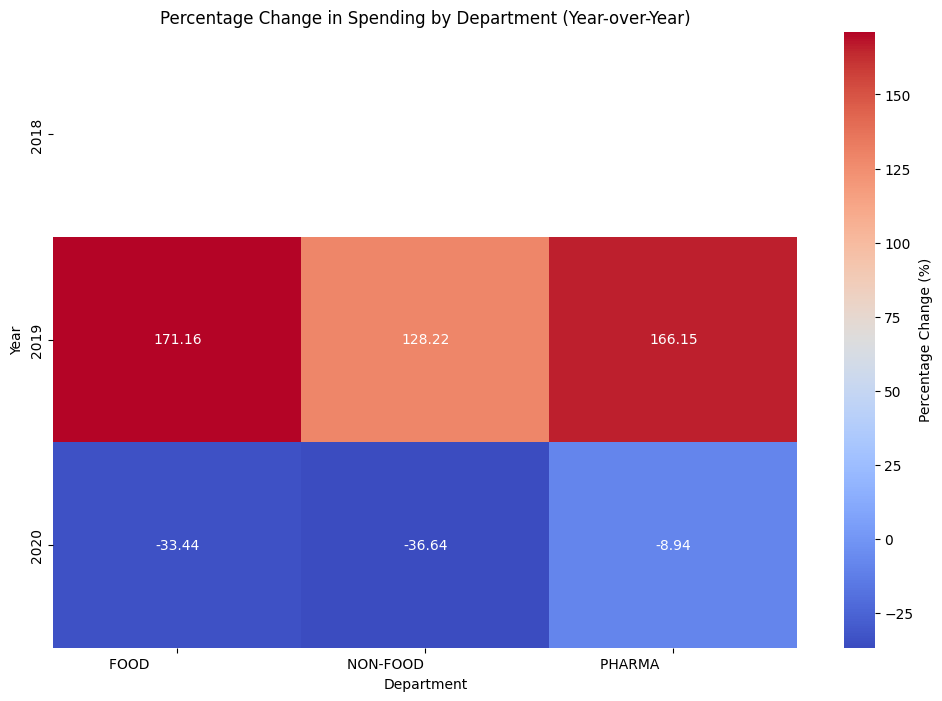

In [134]:
category_growth_spend = category_spend_trends.pivot(index='YEAR', columns='DEPARTMENT', values='SPEND')
category_growth_spend = category_growth_spend.pct_change(axis='index') * 100  # Calculate percentage change per year

plt.figure(figsize=(12, 8))
sns.heatmap(category_growth_spend, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Percentage Change (%)'})
plt.title('Percentage Change in Spending by Department (Year-over-Year)')
plt.xlabel('Department')
plt.ylabel('Year')
plt.show()

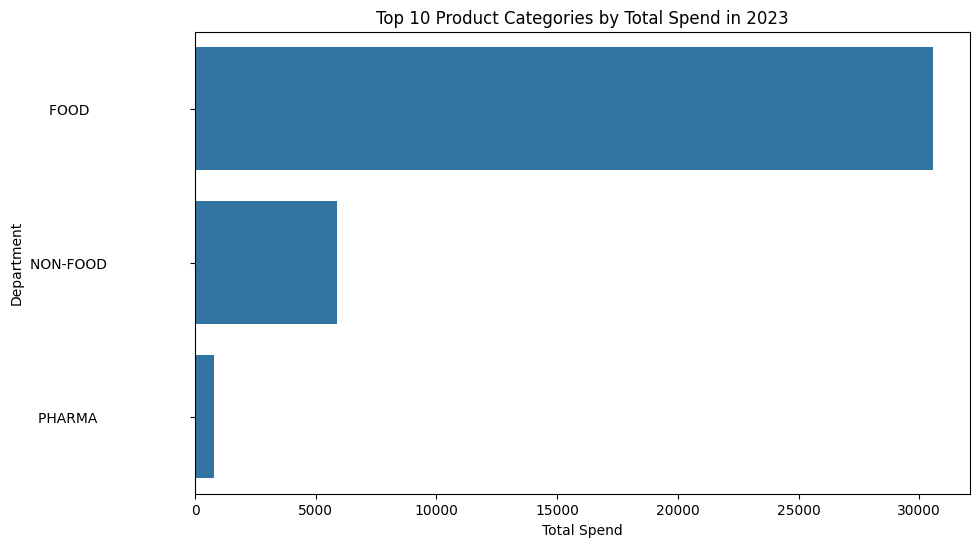

In [135]:
latest_year_spend = final_df[final_df['YEAR'] == 2019].groupby('DEPARTMENT')['SPEND'].sum().reset_index()

# Sort to find the top and bottom categories by total spend
latest_year_spend_sorted = latest_year_spend.sort_values(by='SPEND', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='SPEND', y='DEPARTMENT', data=latest_year_spend_sorted.head(10))  # Top 10 departments
plt.title('Top 10 Product Categories by Total Spend in 2023')
plt.xlabel('Total Spend')
plt.ylabel('Department')
plt.show()

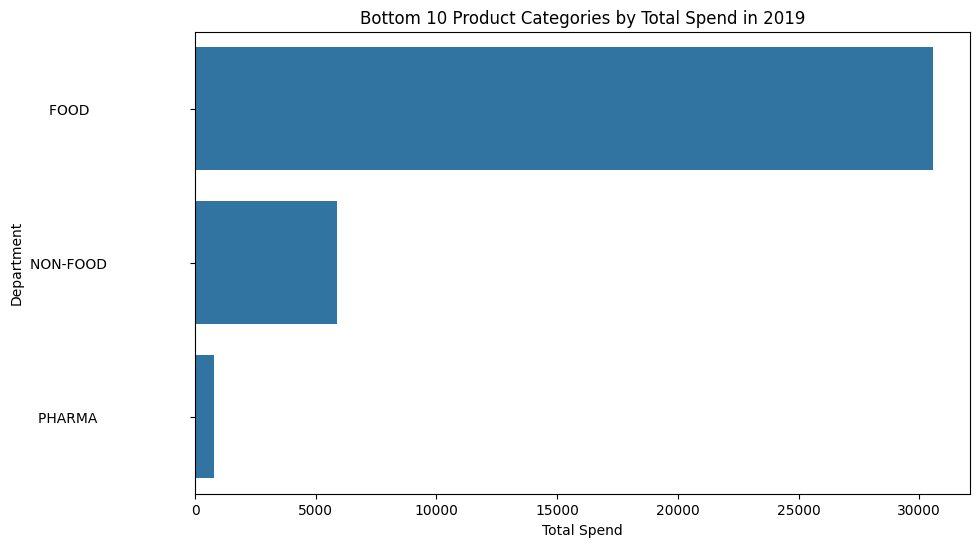

In [136]:
plt.figure(figsize=(10, 6))
sns.barplot(x='SPEND', y='DEPARTMENT', data=latest_year_spend_sorted.tail(10))  # Bottom 10 departments
plt.title('Bottom 10 Product Categories by Total Spend in 2019')
plt.xlabel('Total Spend')
plt.ylabel('Department')
plt.show()


In [137]:
final_df.head().T

,0,1,2,3,4
_id_x,6755fdb67385affce01784ea,6755fdb67385affce017bd98,6755fdb67385affce017c9e5,6755fdb67385affce01784f2,6755fdb67385affce017b850
BASKET_NUM,3685,55657,14165,20015,19393
HSHD_NUM,3889,3889,3889,3889,1433
PURCHASE_,16-SEP-18,17-NOV-19,09-DEC-18,26-JAN-19,20-JAN-19
PRODUCT_NUM,912428,912428,912428,5465881,5465881
SPEND,1.99,1.99,1.99,1.49,1.69
UNITS,1,1,1,1,1
STORE_R,SOUTH,SOUTH,SOUTH,SOUTH,WEST
WEEK_NUM,37,46,49,3,3
YEAR,2018,2019,2018,2019,2019


In [138]:
final_df.columns = final_df.columns.str.replace(r'\s+', '', regex=True)

In [139]:
for column in final_df.columns:
    print(f"{column}: {final_df[column].value_counts()} \n\n")

_id_x: _id_x
6755fdb67385affce01784ea    1
6755fdb67385affce0178fdb    1
6755fdb67385affce017949d    1
6755fdb67385affce017c1e7    1
6755fdb67385affce0179432    1
                           ..
6755fdb67385affce017bbdd    1
6755fdb67385affce01796e9    1
6755fdb67385affce017882d    1
6755fdb67385affce017a984    1
6755fdb67385affce017bbd2    1
Name: count, Length: 20000, dtype: int64 


BASKET_NUM: BASKET_NUM
70349    7
62255    6
9826     6
64848    6
69786    6
        ..
56552    1
12687    1
13076    1
5078     1
63908    1
Name: count, Length: 15979, dtype: int64 


HSHD_NUM: HSHD_NUM
2512    236
1241    179
2780    170
60      169
1245    160
       ... 
1462      1
1358      1
2934      1
2429      1
1461      1
Name: count, Length: 354, dtype: int64 


PURCHASE_: PURCHASE_
15-MAR-20    62
17-NOV-19    61
02-FEB-20    58
30-SEP-18    54
31-MAR-19    54
             ..
10-JUL-19     9
05-FEB-19     9
29-NOV-19     9
28-NOV-19     8
20-FEB-19     8
Name: count, Length: 728, dtype: in

seasonal trends

In [140]:
final_df['PURCHASE_DATE'] = pd.to_datetime(final_df['PURCHASE_'], format='%d-%b-%y')

# Assign season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

final_df['season'] = final_df['PURCHASE_DATE'].dt.month.apply(get_season)

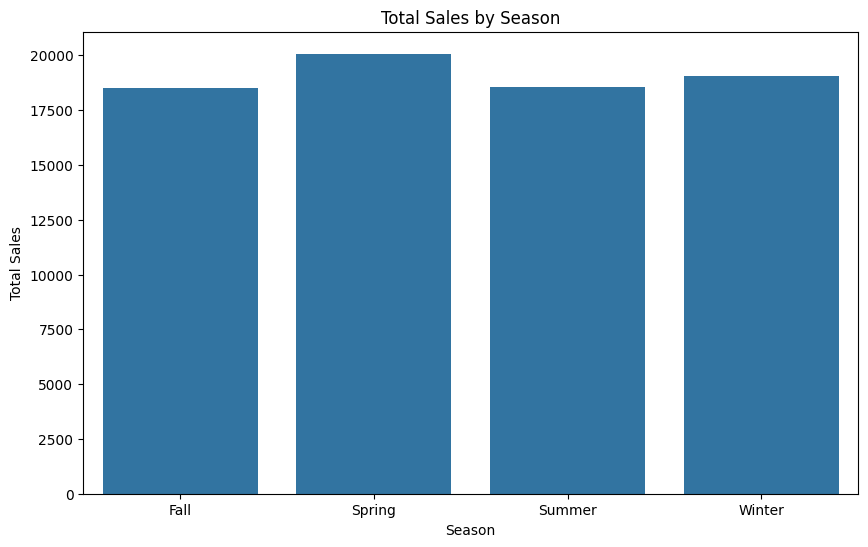

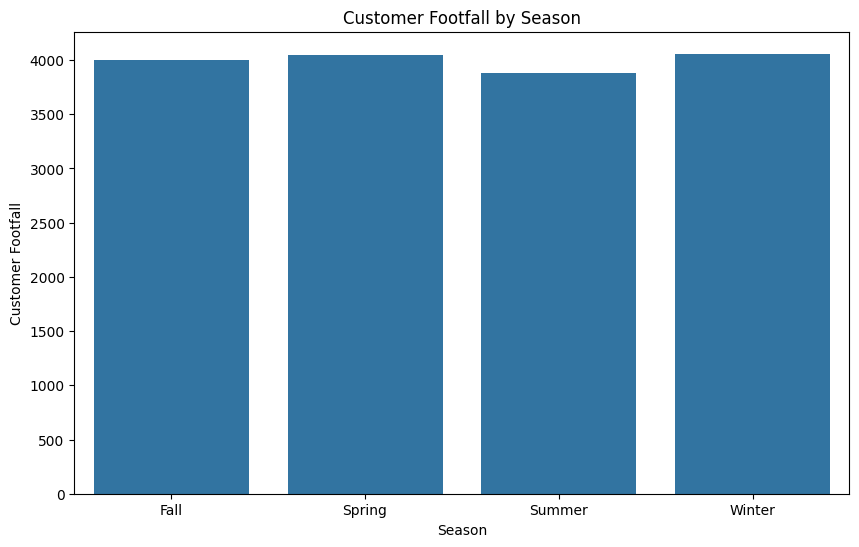

In [141]:
seasonal_sales = final_df.groupby(['season'])['SPEND'].sum().reset_index()
seasonal_footfall = final_df.groupby(['season'])['BASKET_NUM'].nunique().reset_index()

# Visualizing total sales by season
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_sales, x='season', y='SPEND')
plt.title('Total Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()

# Visualizing customer footfall by season
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_footfall, x='season', y='BASKET_NUM')
plt.title('Customer Footfall by Season')
plt.xlabel('Season')
plt.ylabel('Customer Footfall')
plt.show()

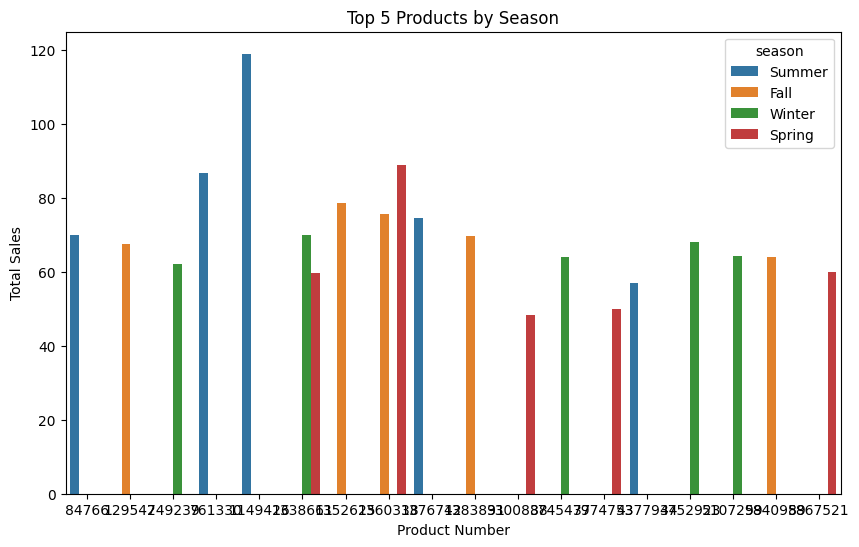

In [142]:
seasonal_product_sales = final_df.groupby(['season', 'PRODUCT_NUM'])['SPEND'].sum().reset_index()

# Identify top products by season (for example, top 5 products in each season)
top_products_per_season = seasonal_product_sales.groupby('season').apply(lambda x: x.nlargest(5, 'SPEND')).reset_index(drop=True)

# Visualizing top products per season
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products_per_season, x='PRODUCT_NUM', y='SPEND', hue='season')
plt.title('Top 5 Products by Season')
plt.xlabel('Product Number')
plt.ylabel('Total Sales')
plt.show()

In [143]:
high_demand_products = top_products_per_season[['season', 'PRODUCT_NUM']]

# Assuming a recommendation logic to suggest inventory for products with seasonal spikes
inventory_recommendation = high_demand_products.groupby('season')['PRODUCT_NUM'].apply(list).reset_index()
print(inventory_recommendation)

   season                                    PRODUCT_NUM
0    Fall   [1352625, 1360338, 1383891, 129547, 5840989]
1  Spring  [1360338, 5867521, 1338661, 3974753, 3300888]
2  Summer     [1149426, 761330, 1376742, 84766, 4377934]
3  Winter   [1338661, 4752923, 5107299, 3745477, 249239]


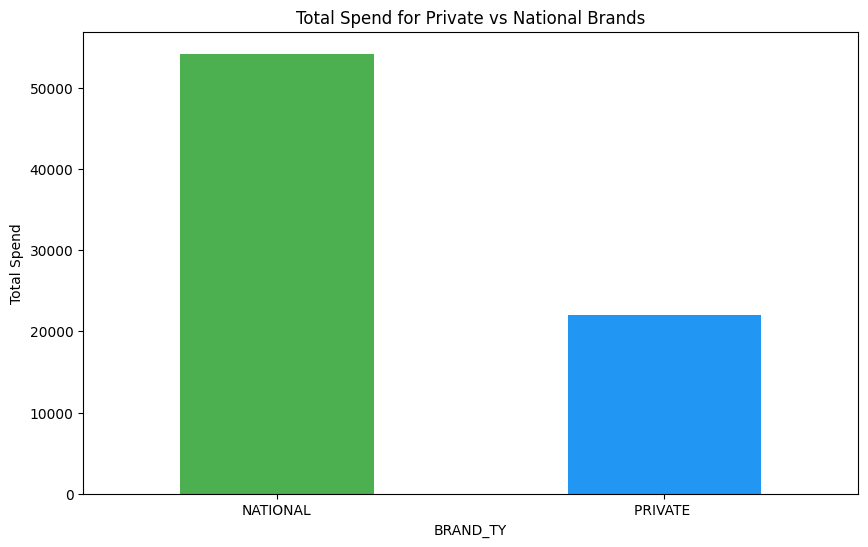

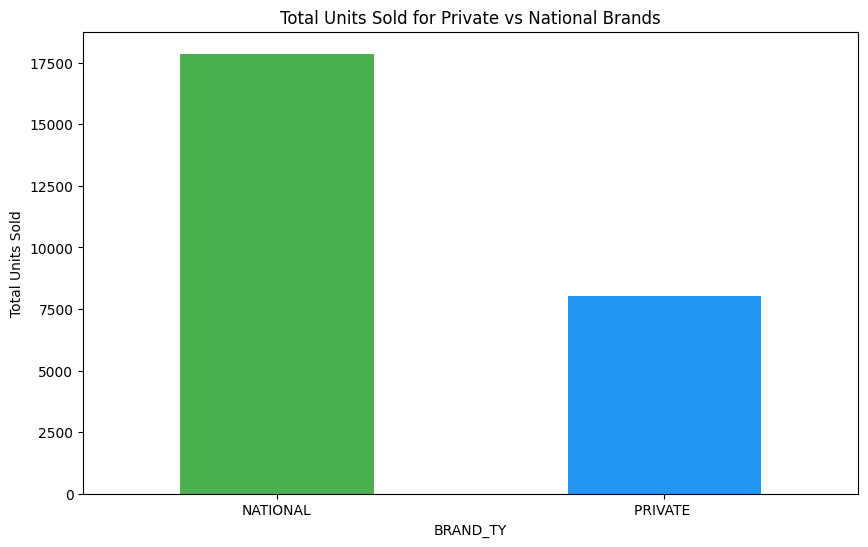

In [144]:
# Group the data by 'BRAND_TY' (Private vs National) and calculate the total spend or units
brand_preference = final_df.groupby('BRAND_TY')[['SPEND', 'UNITS']].sum()

# Plotting the data to visualize the preference
import matplotlib.pyplot as plt

# Plotting total spend by brand type
plt.figure(figsize=(10,6))
brand_preference['SPEND'].plot(kind='bar', color=['#4CAF50', '#2196F3'])
plt.title('Total Spend for Private vs National Brands')
plt.ylabel('Total Spend')
plt.xticks(rotation=0)
plt.show()

# Plotting total units sold by brand type
plt.figure(figsize=(10,6))
brand_preference['UNITS'].plot(kind='bar', color=['#4CAF50', '#2196F3'])
plt.title('Total Units Sold for Private vs National Brands')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=0)
plt.show()

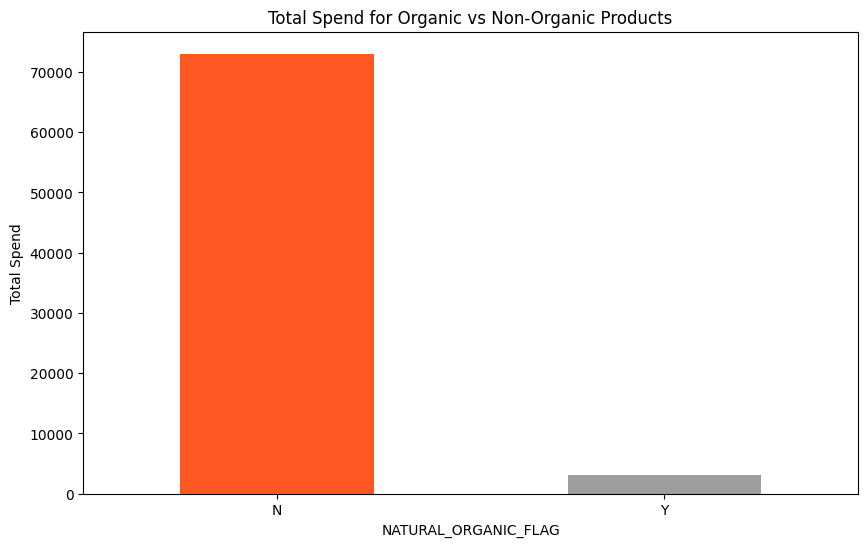

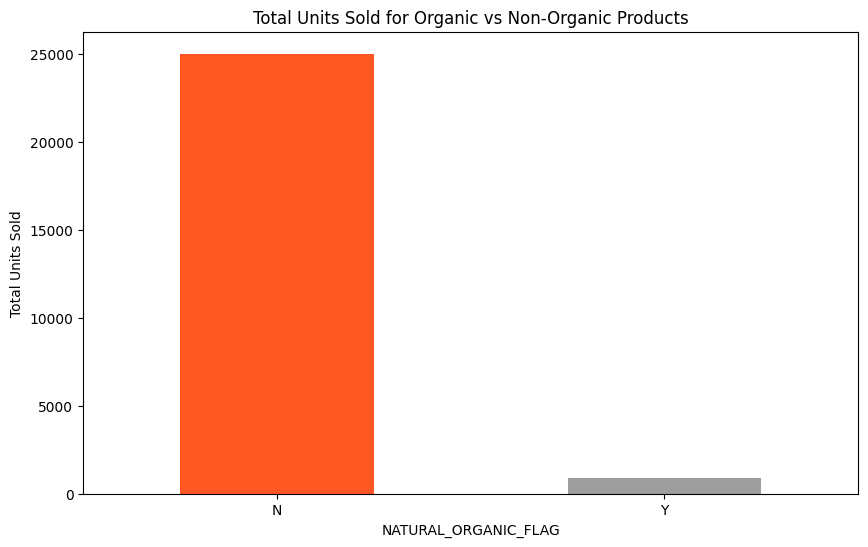

In [145]:
# Group the data by 'NATURAL_ORGANIC_FLAG' (Organic vs Non-organic) and calculate the total spend or units
organic_preference = final_df.groupby('NATURAL_ORGANIC_FLAG')[['SPEND', 'UNITS']].sum()

# Plotting the data to visualize the preference
plt.figure(figsize=(10,6))
organic_preference['SPEND'].plot(kind='bar', color=['#FF5722', '#9E9E9E'])
plt.title('Total Spend for Organic vs Non-Organic Products')
plt.ylabel('Total Spend')
plt.xticks(rotation=0)
plt.show()

# Plotting total units sold by organic flag
plt.figure(figsize=(10,6))
organic_preference['UNITS'].plot(kind='bar', color=['#FF5722', '#9E9E9E'])
plt.title('Total Units Sold for Organic vs Non-Organic Products')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=0)
plt.show()

In [146]:
final_df['BRAND_TY'].unique()

array(['NATIONAL', 'PRIVATE '], dtype=object)

In [147]:
from scipy import stats

private_brand_spend = final_df[final_df['BRAND_TY'] == 'PRIVATE ']['SPEND']
national_brand_spend = final_df[final_df['BRAND_TY'] == 'NATIONAL']['SPEND']

t_stat, p_value = stats.ttest_ind(private_brand_spend, national_brand_spend, nan_policy='omit')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -9.803872089449056
P-value: 1.218608800523074e-22


In [148]:
organic_spend = final_df[final_df['NATURAL_ORGANIC_FLAG'] == 'Y']['SPEND']
non_organic_spend = final_df[final_df['NATURAL_ORGANIC_FLAG'] == 'N']['SPEND']

# Perform a t-test to check if there's a significant difference in spending
t_stat, p_value = stats.ttest_ind(organic_spend, non_organic_spend, nan_policy='omit')

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 6.383891459431636
P-value: 1.7643829775881923e-10


In [149]:
final_df

,_id_x,BASKET_NUM,HSHD_NUM,PURCHASE_,PRODUCT_NUM,SPEND,UNITS,STORE_R,WEEK_NUM,YEAR,...,HSHD_COMPOSITION,HH_SIZE,CHILDREN,_id,DEPARTMENT,COMMODITY,BRAND_TY,NATURAL_ORGANIC_FLAG,PURCHASE_DATE,season
0,6755fdb67385affce01784ea,3685,3889,16-SEP-18,912428,1.99,1,SOUTH,37,2018,...,2 Adults and Kids,4 ...,2,6755fda67385affce0175dcf,FOOD,GROCERY STAPLE,NATIONAL,N,2018-09-16,Fall
1,6755fdb67385affce017bd98,55657,3889,17-NOV-19,912428,1.99,1,SOUTH,46,2019,...,2 Adults and Kids,4 ...,2,6755fda67385affce0175dcf,FOOD,GROCERY STAPLE,NATIONAL,N,2019-11-17,Fall
2,6755fdb67385affce017c9e5,14165,3889,09-DEC-18,912428,1.99,1,SOUTH,49,2018,...,2 Adults and Kids,4 ...,2,6755fda67385affce0175dcf,FOOD,GROCERY STAPLE,NATIONAL,N,2018-12-09,Winter
3,6755fdb67385affce01784f2,20015,3889,26-JAN-19,5465881,1.49,1,SOUTH,3,2019,...,2 Adults and Kids,4 ...,2,6755fda67385affce016c9fe,FOOD,GROCERY STAPLE,PRIVATE,N,2019-01-26,Winter
4,6755fdb67385affce017b850,19393,1433,20-JAN-19,5465881,1.69,1,WEST,3,2019,...,2 Adults and Kids,2 ...,1,6755fda67385affce016c9fe,FOOD,GROCERY STAPLE,PRIVATE,N,2019-01-20,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6755fdb67385affce017b09d,75043,1573,07-MAY-20,5340635,1.25,1,WEST,18,2020,...,2 Adults and Kids,5+ ...,3+,6755fda67385affce016db4d,FOOD,BAKERY,NATIONAL,N,2020-05-07,Spring
19996,6755fdb67385affce017b363,78292,4105,08-JUN-20,341989,1.49,1,WEST,23,2020,...,Single Male,1 ...,1,6755fda67385affce016bb42,FOOD,GROCERY STAPLE,NATIONAL,N,2020-06-08,Summer
19997,6755fdb67385affce017c93b,80581,4105,30-JUN-20,5753186,2.50,1,WEST,26,2020,...,Single Male,1 ...,1,6755fda67385affce0171a60,FOOD,BEVERAGE - NON WATER,NATIONAL,N,2020-06-30,Summer
19998,6755fdb67385affce017b96f,39084,1461,02-JUL-19,4977313,3.50,1,CENTRAL,26,2019,...,1 Adult and Kids,5+ ...,3+,6755fda67385affce0175d32,FOOD,GROCERY STAPLE,NATIONAL,N,2019-07-02,Summer


In [150]:
from mlxtend.frequent_patterns import apriori, association_rules 

In [151]:
final_df.head().T

,0,1,2,3,4
_id_x,6755fdb67385affce01784ea,6755fdb67385affce017bd98,6755fdb67385affce017c9e5,6755fdb67385affce01784f2,6755fdb67385affce017b850
BASKET_NUM,3685,55657,14165,20015,19393
HSHD_NUM,3889,3889,3889,3889,1433
PURCHASE_,16-SEP-18,17-NOV-19,09-DEC-18,26-JAN-19,20-JAN-19
PRODUCT_NUM,912428,912428,912428,5465881,5465881
SPEND,1.99,1.99,1.99,1.49,1.69
UNITS,1,1,1,1,1
STORE_R,SOUTH,SOUTH,SOUTH,SOUTH,WEST
WEEK_NUM,37,46,49,3,3
YEAR,2018,2019,2018,2019,2019


In [152]:
final_df.duplicated().sum()

0

In [153]:
for column in final_df.columns:
    print(f"{column}: {final_df[column].value_counts()}\n\n")

_id_x: _id_x
6755fdb67385affce01784ea    1
6755fdb67385affce0178fdb    1
6755fdb67385affce017949d    1
6755fdb67385affce017c1e7    1
6755fdb67385affce0179432    1
                           ..
6755fdb67385affce017bbdd    1
6755fdb67385affce01796e9    1
6755fdb67385affce017882d    1
6755fdb67385affce017a984    1
6755fdb67385affce017bbd2    1
Name: count, Length: 20000, dtype: int64


BASKET_NUM: BASKET_NUM
70349    7
62255    6
9826     6
64848    6
69786    6
        ..
56552    1
12687    1
13076    1
5078     1
63908    1
Name: count, Length: 15979, dtype: int64


HSHD_NUM: HSHD_NUM
2512    236
1241    179
2780    170
60      169
1245    160
       ... 
1462      1
1358      1
2934      1
2429      1
1461      1
Name: count, Length: 354, dtype: int64


PURCHASE_: PURCHASE_
15-MAR-20    62
17-NOV-19    61
02-FEB-20    58
30-SEP-18    54
31-MAR-19    54
             ..
10-JUL-19     9
05-FEB-19     9
29-NOV-19     9
28-NOV-19     8
20-FEB-19     8
Name: count, Length: 728, dtype: int64

In [154]:
final_df.head().T

,0,1,2,3,4
_id_x,6755fdb67385affce01784ea,6755fdb67385affce017bd98,6755fdb67385affce017c9e5,6755fdb67385affce01784f2,6755fdb67385affce017b850
BASKET_NUM,3685,55657,14165,20015,19393
HSHD_NUM,3889,3889,3889,3889,1433
PURCHASE_,16-SEP-18,17-NOV-19,09-DEC-18,26-JAN-19,20-JAN-19
PRODUCT_NUM,912428,912428,912428,5465881,5465881
SPEND,1.99,1.99,1.99,1.49,1.69
UNITS,1,1,1,1,1
STORE_R,SOUTH,SOUTH,SOUTH,SOUTH,WEST
WEEK_NUM,37,46,49,3,3
YEAR,2018,2019,2018,2019,2019


In [155]:
final_df.drop(columns=['_id_x', '_id_y', '_id'], inplace=True)

In [156]:
final_df.head().T

,0,1,2,3,4
BASKET_NUM,3685,55657,14165,20015,19393
HSHD_NUM,3889,3889,3889,3889,1433
PURCHASE_,16-SEP-18,17-NOV-19,09-DEC-18,26-JAN-19,20-JAN-19
PRODUCT_NUM,912428,912428,912428,5465881,5465881
SPEND,1.99,1.99,1.99,1.49,1.69
UNITS,1,1,1,1,1
STORE_R,SOUTH,SOUTH,SOUTH,SOUTH,WEST
WEEK_NUM,37,46,49,3,3
YEAR,2018,2019,2018,2019,2019
L,Y,Y,Y,Y,Y


In [157]:
final_df.describe()

,BASKET_NUM,HSHD_NUM,PRODUCT_NUM,SPEND,UNITS,WEEK_NUM,YEAR,PURCHASE_DATE
count,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000
mean,43977.583200,2468.108800,2.706224e+06,3.808411,1.295000,26.494550,2019.121200,2019-08-15 07:16:27.840000256
min,6.000000,10.000000,6.284000e+03,-12.990000,-4.000000,1.000000,2018.000000,2018-08-17 00:00:00
25%,21863.500000,1265.000000,1.016870e+05,1.690000,1.000000,13.000000,2019.000000,2019-02-10 00:00:00
50%,44575.500000,2436.000000,1.091014e+06,2.790000,1.000000,27.000000,2019.000000,2019-08-16 00:00:00
75%,66524.250000,3672.000000,5.386499e+06,4.490000,1.000000,40.000000,2020.000000,2020-02-16 00:00:00
max,85324.000000,4987.000000,7.386030e+06,70.730000,25.000000,52.000000,2020.000000,2020-08-15 00:00:00
std,24987.058346,1377.133641,2.670107e+06,3.968578,0.859134,15.115995,0.698953,NaN


In [158]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   BASKET_NUM            20000 non-null  int64         
 1   HSHD_NUM              20000 non-null  int64         
 2   PURCHASE_             20000 non-null  object        
 3   PRODUCT_NUM           20000 non-null  int64         
 4   SPEND                 20000 non-null  float64       
 5   UNITS                 20000 non-null  int64         
 6   STORE_R               20000 non-null  object        
 7   WEEK_NUM              20000 non-null  int64         
 8   YEAR                  20000 non-null  int64         
 9   L                     20000 non-null  object        
 10  AGE_RANGE             20000 non-null  object        
 11  MARITAL               20000 non-null  object        
 12  INCOME_RANGE          20000 non-null  object        
 13  HOMEOWNER       

In [159]:
final_df = final_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [160]:
final_df.head().T

,0,1,2,3,4
BASKET_NUM,3685,55657,14165,20015,19393
HSHD_NUM,3889,3889,3889,3889,1433
PURCHASE_,16-SEP-18,17-NOV-19,09-DEC-18,26-JAN-19,20-JAN-19
PRODUCT_NUM,912428,912428,912428,5465881,5465881
SPEND,1.99,1.99,1.99,1.49,1.69
UNITS,1,1,1,1,1
STORE_R,SOUTH,SOUTH,SOUTH,SOUTH,WEST
WEEK_NUM,37,46,49,3,3
YEAR,2018,2019,2018,2019,2019
L,Y,Y,Y,Y,Y


In [161]:
for column in final_df.columns:
    print(f"{column}: {final_df[column].dtype}")

BASKET_NUM: int64
HSHD_NUM: int64
PURCHASE_: object
PRODUCT_NUM: int64
SPEND: float64
UNITS: int64
STORE_R: object
WEEK_NUM: int64
YEAR: int64
L: object
AGE_RANGE: object
MARITAL: object
INCOME_RANGE: object
HOMEOWNER: object
HSHD_COMPOSITION: object
HH_SIZE: object
CHILDREN: object
DEPARTMENT: object
COMMODITY: object
BRAND_TY: object
NATURAL_ORGANIC_FLAG: object
PURCHASE_DATE: datetime64[ns]
season: object


In [162]:
final_df['HH_SIZE'] = pd.to_numeric(final_df['HH_SIZE'], errors='coerce')
for column in final_df.columns:
    print(f"{column}: {final_df[column].dtype}")

BASKET_NUM: int64
HSHD_NUM: int64
PURCHASE_: object
PRODUCT_NUM: int64
SPEND: float64
UNITS: int64
STORE_R: object
WEEK_NUM: int64
YEAR: int64
L: object
AGE_RANGE: object
MARITAL: object
INCOME_RANGE: object
HOMEOWNER: object
HSHD_COMPOSITION: object
HH_SIZE: float64
CHILDREN: object
DEPARTMENT: object
COMMODITY: object
BRAND_TY: object
NATURAL_ORGANIC_FLAG: object
PURCHASE_DATE: datetime64[ns]
season: object


In [163]:
final_df['CHILDREN'] = pd.to_numeric(final_df['CHILDREN'], errors='coerce')
for column in final_df.columns:
    print(f"{column}: {final_df[column].dtype}")

BASKET_NUM: int64
HSHD_NUM: int64
PURCHASE_: object
PRODUCT_NUM: int64
SPEND: float64
UNITS: int64
STORE_R: object
WEEK_NUM: int64
YEAR: int64
L: object
AGE_RANGE: object
MARITAL: object
INCOME_RANGE: object
HOMEOWNER: object
HSHD_COMPOSITION: object
HH_SIZE: float64
CHILDREN: float64
DEPARTMENT: object
COMMODITY: object
BRAND_TY: object
NATURAL_ORGANIC_FLAG: object
PURCHASE_DATE: datetime64[ns]
season: object


In [164]:
# Group transactions by BASKET_NUM and aggregate the products
transaction_data = final_df.groupby('BASKET_NUM')['PRODUCT_NUM'].apply(list)

# Convert to DataFrame
transaction_df = pd.DataFrame({'BASKET_NUM': transaction_data.index, 'PRODUCTS': transaction_data.values})

# Display sample transactions
print(transaction_df.head())

   BASKET_NUM         PRODUCTS
0           6        [6739154]
1           7        [5538978]
2          16  [9049, 1383814]
3          21        [4889808]
4          24        [5129405]


In [165]:
from mlxtend.preprocessing import TransactionEncoder

# Initialize TransactionEncoder
te = TransactionEncoder()

# Transform the transactions into one-hot encoded format
te_data = te.fit(transaction_df['PRODUCTS']).transform(transaction_df['PRODUCTS'])

# Convert to DataFrame
encoded_df = pd.DataFrame(te_data, columns=te.columns_)

# Display the encoded data
print(encoded_df.head())

   6284     6522     6524     6532     6533     6552     6583     6747     \
0    False    False    False    False    False    False    False    False   
1    False    False    False    False    False    False    False    False   
2    False    False    False    False    False    False    False    False   
3    False    False    False    False    False    False    False    False   
4    False    False    False    False    False    False    False    False   

   6814     7506     ...  7360374  7361406  7361660  7363767  7364368  \
0    False    False  ...    False    False    False    False    False   
1    False    False  ...    False    False    False    False    False   
2    False    False  ...    False    False    False    False    False   
3    False    False  ...    False    False    False    False    False   
4    False    False  ...    False    False    False    False    False   

   7367975  7371604  7372167  7385965  7386030  
0    False    False    False    False    False  


In [166]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(encoded_df, min_support=0.0005, use_colnames=True)

# Display frequent itemsets
print(frequent_itemsets.head())

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.05, num_itemsets=final_df.shape[0])

# Display association rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

    support itemsets
0  0.001001   (6583)
1  0.002378   (7592)
2  0.006509   (8436)
3  0.000751   (8447)
4  0.000751   (8448)
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [167]:
print(transaction_df.head())
print(transaction_df['PRODUCTS'].iloc[0])

   BASKET_NUM         PRODUCTS
0           6        [6739154]
1           7        [5538978]
2          16  [9049, 1383814]
3          21        [4889808]
4          24        [5129405]
[6739154]


In [168]:
print(encoded_df.head())
print(encoded_df.sum().sum())

   6284     6522     6524     6532     6533     6552     6583     6747     \
0    False    False    False    False    False    False    False    False   
1    False    False    False    False    False    False    False    False   
2    False    False    False    False    False    False    False    False   
3    False    False    False    False    False    False    False    False   
4    False    False    False    False    False    False    False    False   

   6814     7506     ...  7360374  7361406  7361660  7363767  7364368  \
0    False    False  ...    False    False    False    False    False   
1    False    False  ...    False    False    False    False    False   
2    False    False  ...    False    False    False    False    False   
3    False    False  ...    False    False    False    False    False   
4    False    False  ...    False    False    False    False    False   

   7367975  7371604  7372167  7385965  7386030  
0    False    False    False    False    False  


20000


Churn Prediction

In [169]:
final_df['PURCHASE_DATE'] = pd.to_datetime(final_df['PURCHASE_'], format='%d-%b-%y')
final_df['year'] = final_df['PURCHASE_DATE'].dt.year

# Aggregate total spend, frequency of purchase, and recency
customer_engagement = final_df.groupby(['HSHD_NUM', 'year']).agg(
    total_spend=('SPEND', 'sum'),
    frequency_of_purchase=('BASKET_NUM', 'nunique'),
    recency_of_purchase=('PURCHASE_DATE', lambda x: (x.max() - x.min()).days)
).reset_index()

# Step 2: Identify Disengaged Customers
# Calculate the difference in spending and frequency between consecutive years
customer_engagement['spend_diff'] = customer_engagement.groupby('HSHD_NUM')['total_spend'].diff()
customer_engagement['frequency_diff'] = customer_engagement.groupby('HSHD_NUM')['frequency_of_purchase'].diff()

# Define disengagement criteria: If the spend or frequency drops significantly between 2018 and 2019
customer_engagement['disengaged'] = np.where((customer_engagement['spend_diff'] < -0.2) | 
                                             (customer_engagement['frequency_diff'] < -0.2), 1, 0)


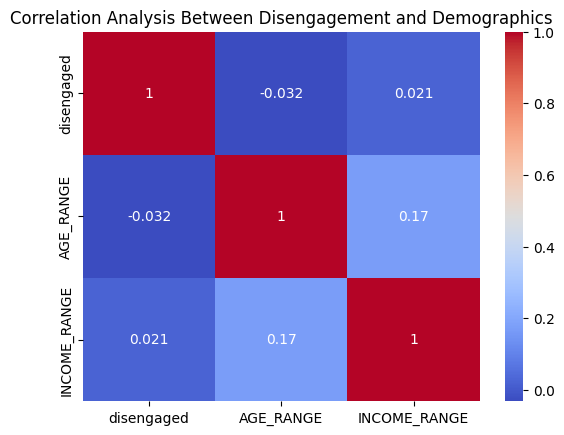

In [170]:
demographics = final_df[['HSHD_NUM', 'AGE_RANGE', 'INCOME_RANGE']].drop_duplicates()

# Merge demographics with engagement data
customer_engagement = customer_engagement.merge(demographics, on='HSHD_NUM', how='left')

# Correlation between disengagement and demographics
correlation = customer_engagement[['disengaged', 'AGE_RANGE', 'INCOME_RANGE']].copy()

# Map categorical variables to numerical values for correlation
correlation['AGE_RANGE'] = correlation['AGE_RANGE'].astype('category').cat.codes
correlation['INCOME_RANGE'] = correlation['INCOME_RANGE'].astype('category').cat.codes

correlation_matrix = correlation.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Analysis Between Disengagement and Demographics")
plt.show()

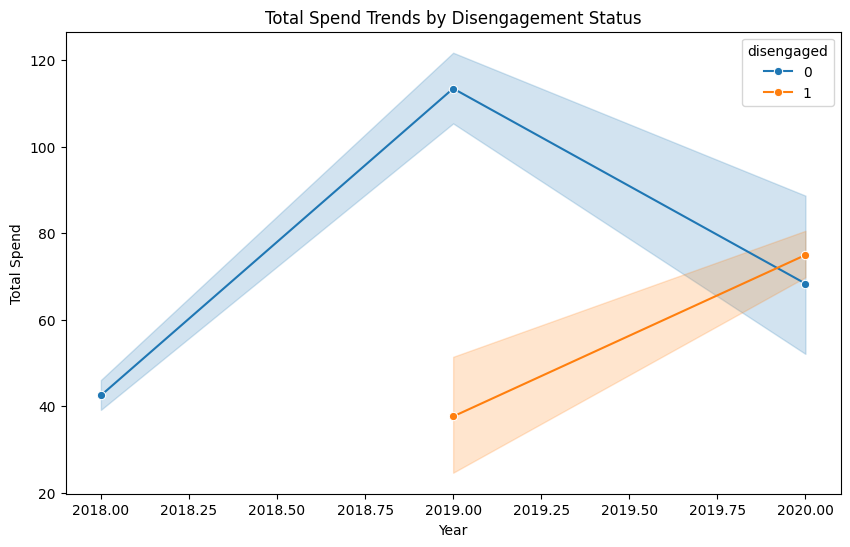

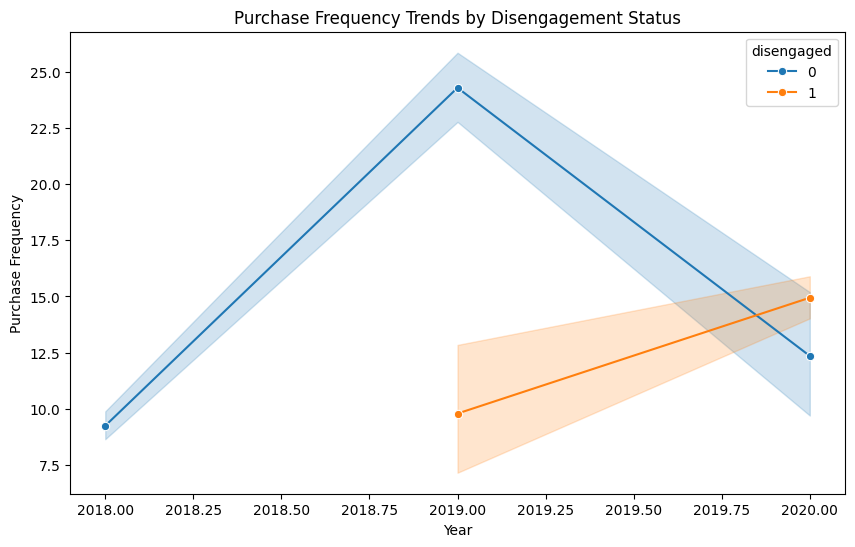

In [171]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=customer_engagement, x='year', y='total_spend', hue='disengaged', marker='o')
plt.title("Total Spend Trends by Disengagement Status")
plt.xlabel("Year")
plt.ylabel("Total Spend")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=customer_engagement, x='year', y='frequency_of_purchase', hue='disengaged', marker='o')
plt.title("Purchase Frequency Trends by Disengagement Status")
plt.xlabel("Year")
plt.ylabel("Purchase Frequency")
plt.show()

In [173]:
encoded_df.columns

Index([   6284,    6522,    6524,    6532,    6533,    6552,    6583,    6747,
          6814,    7506,
       ...
       7360374, 7361406, 7361660, 7363767, 7364368, 7367975, 7371604, 7372167,
       7385965, 7386030],
      dtype='int64', length=10883)

In [177]:
final_df.head().T

,0,1,2,3,4
BASKET_NUM,3685,55657,14165,20015,19393
HSHD_NUM,3889,3889,3889,3889,1433
PURCHASE_,16-SEP-18,17-NOV-19,09-DEC-18,26-JAN-19,20-JAN-19
PRODUCT_NUM,912428,912428,912428,5465881,5465881
SPEND,1.99,1.99,1.99,1.49,1.69
UNITS,1,1,1,1,1
STORE_R,SOUTH,SOUTH,SOUTH,SOUTH,WEST
WEEK_NUM,37,46,49,3,3
YEAR,2018,2019,2018,2019,2019
L,Y,Y,Y,Y,Y


In [180]:
from sklearn.preprocessing import LabelEncoder
label_columns = ['STORE_R', 'AGE_RANGE', 'MARITAL', 'INCOME_RANGE', 'HOMEOWNER', 'HSHD_COMPOSITION', 'DEPARTMENT', 'COMMODITY', 'BRAND_TY', 'NATURAL_ORGANIC_FLAG', 'season']
for col in label_columns:
    le = LabelEncoder()
    final_df[col] = le.fit_transform(final_df[col])

In [182]:
final_df.head().T

,0,1,2,3,4
BASKET_NUM,3685,55657,14165,20015,19393
HSHD_NUM,3889,3889,3889,3889,1433
PURCHASE_,16-SEP-18,17-NOV-19,09-DEC-18,26-JAN-19,20-JAN-19
PRODUCT_NUM,912428,912428,912428,5465881,5465881
SPEND,1.99,1.99,1.99,1.49,1.69
UNITS,1,1,1,1,1
STORE_R,2,2,2,2,3
WEEK_NUM,37,46,49,3,3
YEAR,2018,2019,2018,2019,2019
L,Y,Y,Y,Y,Y


In [183]:
final_df['L'] = le.fit_transform(final_df['L'])

In [185]:
final_df.drop(columns=['PURCHASE_DATE'], inplace=True)

In [186]:
final_df.head().T

,0,1,2,3,4
BASKET_NUM,3685,55657,14165,20015,19393
HSHD_NUM,3889,3889,3889,3889,1433
PURCHASE_,16-SEP-18,17-NOV-19,09-DEC-18,26-JAN-19,20-JAN-19
PRODUCT_NUM,912428,912428,912428,5465881,5465881
SPEND,1.99,1.99,1.99,1.49,1.69
UNITS,1,1,1,1,1
STORE_R,2,2,2,2,3
WEEK_NUM,37,46,49,3,3
YEAR,2018,2019,2018,2019,2019
L,1,1,1,1,1


In [189]:
final_df['PURCHASE_'] = pd.to_datetime(final_df['PURCHASE_'])

# 2. Extract year, month, and day from PURCHASE_DATE
final_df['purchase_year'] = final_df['PURCHASE_'].dt.year
final_df['purchase_month'] = final_df['PURCHASE_'].dt.month
final_df['purchase_day'] = final_df['PURCHASE_'].dt.day

In [191]:
final_df.head().T
final_df.drop(columns=['PURCHASE_'], inplace=True)

In [192]:
# 1. Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd

# Assuming df is the DataFrame we created earlier
# 2. Prepare the data (features X and target y)
# Let's assume we're predicting 'SPEND' (you can change the target to any column you want)

X = final_df.drop(columns=['SPEND'])  # Drop target and non-numeric columns
y = final_df['SPEND']  # Target variable

# 3. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 5. Train the model
rf_model.fit(X_train, y_train)

# 6. Make predictions
y_pred = rf_model.predict(X_test)

# 7. Evaluate the model (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 1.7815018000000005
